In [4]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [112]:
df=pd.read_csv('packages/data/cleaned/terrorism.csv',encoding = "ISO-8859-1",index_col='date',parse_dates=True)

df

,eventid,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,197001010002,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,...,Unknown Gun Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9
1970-01-01,197001050001,0,217,United States,1,North America,Wisconsin,Baraboo,43.468500,-89.744299,...,Unknown Explosive Type,0.0,0.0,0,0.0,PGIS,0,0,0,0
1970-01-02,197001020001,0,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,...,Automatic or Semi-Automatic Rifle,0.0,0.0,0,0.0,PGIS,0,0,0,0
1970-01-02,197001020002,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,...,Unknown Explosive Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9
1970-01-02,197001020003,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,...,Molotov Cocktail/Petrol Bomb,0.0,0.0,1,0.0,Hewitt Project,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,201712290032,0,78,Greece,8,Western Europe,Attica,Piraeus,37.969891,23.642225,...,'',0.0,0.0,-9,0.0,START Primary Collection,0,1,1,1
2017-12-31,201712300002,0,95,Iraq,10,Middle East & North Africa,Kirkuk,Kirkuk,35.452110,44.375465,...,Other Explosive Type,0.0,0.0,0,0.0,START Primary Collection,-9,-9,0,-9
2017-12-31,201712300011,0,37,Cameroon,11,Sub-Saharan Africa,Extreme-North,Bia,11.169421,14.092274,...,Suicide (carried bodily by human being),2.0,28.0,1,0.0,START Primary Collection,1,1,0,1


In [48]:
# df.set_index('iyear')

,iday,imonth,nkill,country_txt,nwound,region_txt,provstate,city,nkillus,nwoundus,...,targtype2_txt,targsubtype2_txt,targtype3_txt,targsubtype3_txt,claimmode_txt,propextent_txt,propextent,propvalue,dbsource,date
iyear,,,,,,,,,,,,,,,,,,,,,
1970,1,1,0.0,United States,0.0,North America,Illinois,Cairo,0.0,0.0,...,'','','','','',Minor (likely < $1 million),3.0,0.0,Hewitt Project,1970-01-01
1970,1,1,0.0,United States,0.0,North America,Wisconsin,Baraboo,0.0,0.0,...,'','','','','',Minor (likely < $1 million),3.0,0.0,PGIS,1970-01-01
1970,2,1,0.0,Uruguay,0.0,South America,Montevideo,Montevideo,0.0,0.0,...,'','','','','','',0.0,0.0,PGIS,1970-01-02
1970,2,1,0.0,United States,0.0,North America,California,Oakland,0.0,0.0,...,'','','','','',Minor (likely < $1 million),3.0,22500.0,Hewitt Project,1970-01-02
1970,2,1,0.0,United States,0.0,North America,Wisconsin,Madison,0.0,0.0,...,'','','','',Letter,Minor (likely < $1 million),3.0,60000.0,Hewitt Project,1970-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,31,12,0.0,Somalia,0.0,Sub-Saharan Africa,Bakool,Wajid,0.0,0.0,...,'','','','','','',0.0,0.0,START Primary Collection,2017-12-31
2017,31,12,13.0,Iraq,0.0,Middle East & North Africa,Diyala,Muqdadiyah,0.0,0.0,...,'','','','','','',0.0,0.0,START Primary Collection,2017-12-31
2017,31,12,5.0,Afghanistan,0.0,South Asia,Logar,Mohammad Agha district,0.0,0.0,...,'','','','',Personal claim,Minor (likely < $1 million),3.0,-99.0,START Primary Collection,2017-12-31


In [113]:
df.head()

,eventid,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,197001010002,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,...,Unknown Gun Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9
1970-01-01,197001050001,0,217,United States,1,North America,Wisconsin,Baraboo,43.468500,-89.744299,...,Unknown Explosive Type,0.0,0.0,0,0.0,PGIS,0,0,0,0
1970-01-02,197001020001,0,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,...,Automatic or Semi-Automatic Rifle,0.0,0.0,0,0.0,PGIS,0,0,0,0
1970-01-02,197001020002,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,...,Unknown Explosive Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9
1970-01-02,197001020003,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,...,Molotov Cocktail/Petrol Bomb,0.0,0.0,1,0.0,Hewitt Project,0,0,0,0


In [91]:
# df.sort_values('iyear', inplace = True)

In [92]:
# df = df[["iyear", "nkill", "country_txt"]]

In [114]:
def convert(df,list):
  for i in list:
    df[i] = df[i].astype('category')


In [115]:
list=['country','region','provstate','city','specificity','vicinity','crit1','crit2','crit3','doubtterr','multiple','success','suicide','attacktype1','targtype1',
      'natlty1','gname','guncertain1','individual','weaptype1','weapsubtype1','property','ishostkid','dbsource'	]

convert(df,list)

In [95]:
# from sklearn import preprocessing

In [96]:
# label_encoder = preprocessing.LabelEncoder()
# df['country'] = label_encoder.fit_transform(df['country_txt'])

In [97]:
# scaler = MinMaxScaler()
# df['country'] = scaler.fit_transform(df[['country']])

In [98]:
# train = df[df["iyear"] < 2010]
# test = df[df["iyear"] >= 2010]

# train.set_index('iyear', inplace = True)
# test.set_index('iyear', inplace=True)
# plt.plot(train['nkill'], color = "black")
# plt.plot(test['nkill'], color = "red")
# plt.ylabel('nkill')
# # plt.xlabel('Annee')
# plt.xticks(rotation=45)
# plt.title("Train/Test split nkill")
# plt.show()

In [99]:
# train

In [116]:
from sklearn import preprocessing

def enc(df,lt):
  for i in lt:
    label_encoder = preprocessing.LabelEncoder() 
    df[i]= label_encoder.fit_transform(df[i])

In [117]:
lt=['provstate','city',
      'gname','dbsource']
enc(df,lt)

In [118]:
df.drop(labels=df.select_dtypes('object').columns, inplace=True, axis=1)

In [119]:
X=df.columns.tolist()


In [120]:
# scaler_nkill = MinMaxScaler()

In [121]:
nkill = df[["nkill"]]

In [122]:
nkill

,nkill
date,
1970-01-01,0.0
1970-01-01,0.0
1970-01-02,0.0
1970-01-02,0.0
1970-01-02,0.0
...,...
2017-12-31,0.0
2017-12-31,0.0
2017-12-31,2.0


In [17]:
# df_kill = scaler_nkill.fit_transform(nkill)

In [18]:
# df_kill

In [19]:
# nkill=pd.DataFrame(df_kill) 
# nkill.index=df.index
# nkill

In [20]:
# nkill.rename(columns={0: "nkill"}, inplace = True)

In [21]:
# df_minmax.to_csv('/content/drive/MyDrive/MasterIA/Datacamp/terror.csv',encoding = "ISO-8859-1", index = False)

In [22]:
# df=pd.read_csv('/content/drive/MyDrive/MasterIA/Datacamp/terror.csv',encoding = "ISO-8859-1",index_col='date',parse_dates=True)

# df

In [23]:
# df.head()

In [123]:
df = nkill

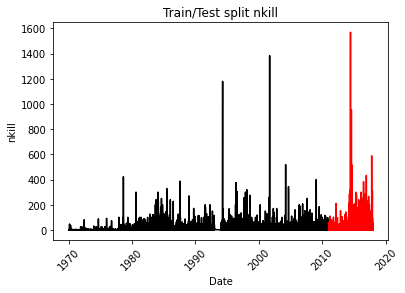

In [124]:
train = df[df.index < pd.to_datetime("2010-12-31", format='%Y-%m-%d')]
test = df[df.index > pd.to_datetime("2010-12-31", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('nkill')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split nkill")
plt.show()

In [26]:
#pip install pmdarima
  
# from pmdarima import auto_arima
  
# import warnings
# warnings.filterwarnings("ignore")
  
# stepwise_fit = auto_arima(train['nkill'], start_p = 1, start_q = 1,
#                           max_p = 3, max_q = 3, m = 12,
#                           start_P = 0, seasonal = True,
#                           d = None, D = 1, trace = True,
#                           error_action ='ignore',  
#                           suppress_warnings = True, 
#                           stepwise = True)          
  
# stepwise_fit.summary()

ARMA model

In [126]:
df.head()

,nkill
date,
1970-01-01,0.0
1970-01-01,0.0
1970-01-02,0.0
1970-01-02,0.0
1970-01-02,0.0


In [111]:
y_pred_df.index[0]

98864

In [127]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y=train['nkill']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(2000000)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
predictions = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
# y_pred_df.index = test.index
# y_pred_out = y_pred_df["Predictions"] 

# plt.plot(y_pred_out, color='green', label = 'Predictions')
# plt.legend()
np.array(predictions)

c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is ava

NameError: name 'np' is not defined

In [108]:
test.index.__len__()

81931

In [83]:
# sar = pd.DataFrame(train["nkill"])
model = SARIMAX(train['nkill'], order = (1, 0, 1), exog=train['country'])

c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [84]:
model.fit()

In [85]:
start = test.index[0]-1
end = test.index[-1]+1

AttributeError: 'SARIMAX' object has no attribute 'summary'

In [38]:
int(Prediction)

1

In [138]:
ARMAmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  nkill   No. Observations:                98864
Model:               SARIMAX(1, 0, 1)   Log Likelihood             -380940.973
Date:                Mon, 23 May 2022   AIC                         761887.947
Time:                        12:23:58   BIC                         761916.451
Sample:                             0   HQIC                        761896.601
                              - 98864                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997   8.56e-05   1.17e+04      0.000       1.000       1.000
ma.L1         -0.9951      0.000  -8365.319      0.000      -0.995      -0.995
sigma2       130.1187      0.017   7586.690      0.000     130.085     130.152
===================================================================================
Ljung-Box (L1) (Q):                 211.68   Jarque-Bera (JB):      131717671778.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.89   Skew:                            55.06
Prob(H) (two-sided):                  0.00   Kurtosis:                      5656.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
test["nkill"].head(10)

date
2011-01-01     0.0
2011-01-01     1.0
2011-01-01    23.0
2011-01-01     1.0
2011-01-02     1.0
2011-01-02     1.0
2011-01-02     0.0
2011-01-02     0.0
2011-01-02     1.0
2011-01-02     0.0
Name: nkill, dtype: float64

In [145]:
predictions = np.array(y_pred_df["Predictions"])

In [146]:
np.unique(predictions)

array([7.46374538e-10, 7.46569354e-10, 7.46764220e-10, ...,
       1.44184380e+00, 1.44222014e+00, 1.44259659e+00])

Transformation en entier

In [118]:
np.unique(np.(scaler_nkill.inverse_transform(predictions.reshape(predictions.shape[0], 1))))

array([0], dtype=int64)

In [147]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["nkill"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  11.251402693251844


ARIMA model

In [148]:
from statsmodels.tsa.arima.model import ARIMA

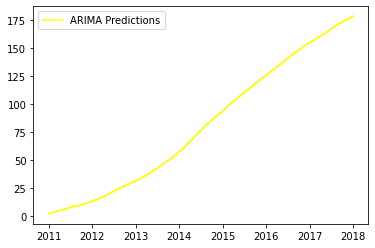

In [149]:
y=train['nkill']
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()




In [150]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["nkill"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  102.00636517531136


Sauvegarde du modele

In [152]:
# ARMAmodel.save('packages/modeles/ARMA/arma.pkl')

save model with pickle

In [32]:
import pickle
with open('packages/modeles/ARMA/arma.txt', "wb") as f:
    pick_model = pickle.Pickler(f)
    pick_model.dump(ARMAmodel)